In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("iris.data",header=None) 

In [8]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.shape

(150, 5)

In [10]:
df.columns = "sep_len","sep_wid","pet_len","pet_wid","class"

In [11]:
df.head()

,sep_len,sep_wid,pet_len,pet_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
missing_data = df.isnull()

In [13]:
missing_data.head()

,sep_len,sep_wid,pet_len,pet_wid,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [14]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

sep_len
False    150
Name: sep_len, dtype: int64

sep_wid
False    150
Name: sep_wid, dtype: int64

pet_len
False    150
Name: pet_len, dtype: int64

pet_wid
False    150
Name: pet_wid, dtype: int64

class
False    150
Name: class, dtype: int64



In [15]:
df["class"]=df["class"].replace(["Iris-setosa","Iris-versicolor","Iris-virginica"],[0,1,2])

In [16]:
df.tail()

,sep_len,sep_wid,pet_len,pet_wid,class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [17]:
X=df[["sep_len","sep_wid","pet_len","pet_wid"]]

In [18]:
X.shape

(150, 4)

In [19]:
y = df['class']

In [20]:
y.shape

(150,)

In [21]:
df.describe()

,sep_len,sep_wid,pet_len,pet_wid,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
df.corr()

,sep_len,sep_wid,pet_len,pet_wid,class
sep_len,1.000000,-0.109369,0.871754,0.817954,0.782561
sep_wid,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
pet_len,0.871754,-0.420516,1.000000,0.962757,0.949043
pet_wid,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [23]:
import numpy as np
import seaborn as sns
#sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


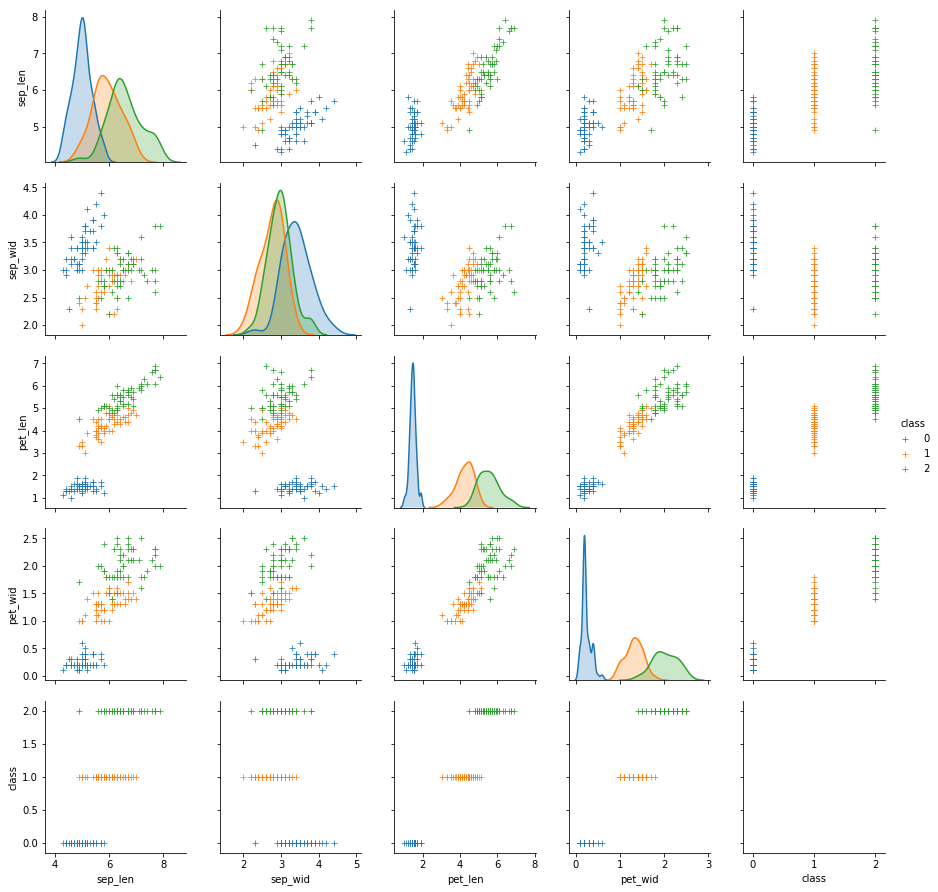

In [24]:
g = sns.pairplot(df, hue='class', markers='+')
plt.show()

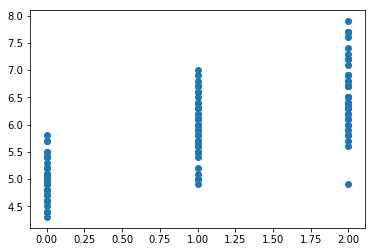

In [25]:
plt.scatter(y,X["sep_len"])
plt.show()

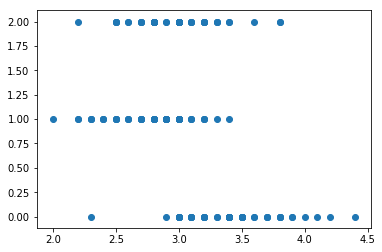

In [26]:
plt.scatter(X["sep_wid"],y)
plt.show()

In [27]:
#Lets make data standard
from sklearn import preprocessing

In [26]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [28]:
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [28]:
#train-test data split
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [30]:
print("X_train Size",X_train.shape)

X_train Size (120, 4)


In [31]:
print("y_train Size",y_train.shape)

y_train Size (120,)


In [35]:
print("X_test Size",X_test.shape)

X_test Size (30, 4)


In [36]:
print("y_test Size",y_test.shape)

y_test Size (30,)


In [32]:
#importing MOdel
from sklearn.linear_model import LogisticRegression

In [42]:
LR = LogisticRegression().fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [43]:
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
yhat = LR.predict(X_test)

In [49]:
yhat.shape

(30,)

In [50]:
y_test.shape

(30,)

In [51]:
yhat

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 2], dtype=int64)

In [52]:
LR.score(X_test,y_test)

0.9333333333333333

In [53]:
X_test.shape

(30, 4)

In [54]:
y_test.shape

(30,)

In [55]:
LR.score(X_train,y_train)

0.9333333333333333

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cnf_matrix = confusion_matrix(y_test,yhat)

In [58]:
cnf_matrix

array([[15,  1,  0],
       [ 0,  5,  0],
       [ 0,  1,  8]], dtype=int64)

In [48]:
LR1 = LogisticRegression(C=0.01,solver='saga').fit(X_train,y_train)
#liblinear,newton-cg,lbfgs,sag,saga = .93

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [49]:
LR1

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
LR1.score(X_test,y_test)

0.9333333333333333